Nieprawidłowo sklasyfikowane próbki: 4
Dokładność: 0.91


C:\Users\Marcin Grabarczyk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


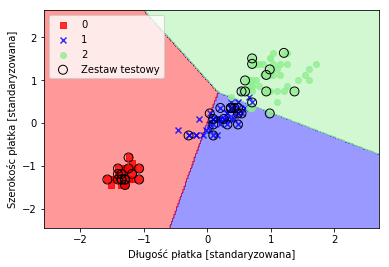

In [7]:
#Perceptron

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:,[2,3]] #ładujemy 2 cechy kwiatów
y = iris.target #ładujemy macierz docelowych klas

#Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 0) 



#Standaryzacja cech treningowych i testowych za pomocą klasy StandardScaler
sc = StandardScaler()
sc.fit(X_train)#oszacowanie średniej oraz odchylenia standardowego cech 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Uczenie modelu. Domyślnie obsługuje metodę OvR
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

#Przewidywanie klas
y_pred = ppn.predict(X_test_std)
print('Nieprawidłowo sklasyfikowane próbki: %d' %(y_test != y_pred).sum())
print('Dokładność: %.2f' % accuracy_score(y_test, y_pred))



def versiontuple(v):
    return(tuple(map(int, (v.split(".")))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    #konfiguracja generatora znaczników i mapę kolorów
    markers = ('s', 'x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker = markers[idx], label=cl)
        
    # zaznacza próbki testowe
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
    plt.scatter(X_test[:,0], X_test[:,1], c='',
               alpha=1.0, linewidth=1, marker='o', edgecolors='k',
               s=80, label='Zestaw testowy')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokośc płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()

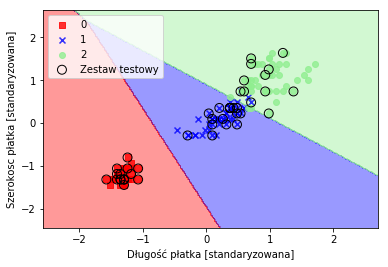

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

In [9]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokosc płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()

lr.predict_proba(X_test_std[0,:].reshape(1,-1))#Prognoza natrafienia na poszczególne klasy przy pierwszym doborze próbki

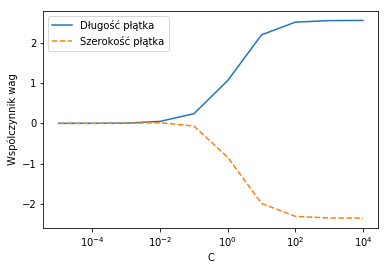

In [23]:
#Stopień regularyzacji
weights, params = [], []
for c in  np.arange(-5,5,dtype=np.float):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights=np.array(weights)
plt.plot(params,weights[:,0],
        label='Długość płątka')
plt.plot(params, weights[:,1], linestyle='--',
        label='Szerokość płątka')
plt.ylabel('Wspólczynnik wag')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()



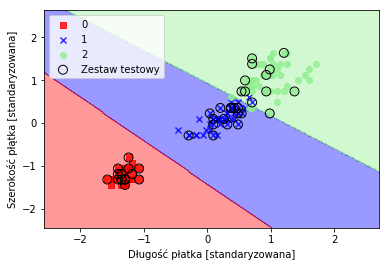

In [24]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płątka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()